# Relationship of Sugar & Velocity

In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))
%load_ext autoreload
%autoreload 2

In [2]:
from utils.libaries import *
from utils.data_loading import findFiles,LoadDataSignals
from utils.global_parameters import *
from Data_Denoising.data_denoising import *
from Data_Denoising.time_synchronization import *
from Data_Denoising.moving_average_filter import *
from Data_Denoising.derivative_filtering import apply_improved_derivative_filter
from Data_Denoising.dc_offset_removal import *
from plotting_module.signal_plot import *
from Data_Denoising.bandpass_filtering import *
from waveform_detection.detect_waveform import *
from waveform_detection.pan_algorithm import *
from time_of_flight_calculation.zero_crossings import *
from time_of_flight_calculation.tof import *
from time_of_flight_calculation.velocity import *
from time_of_flight_calculation.sugar_velocity_relationship import *
from plotting_module.signal_veclocity_plot import *
from time_of_flight_calculation.correlation import *
from time_of_flight_calculation.metrics import *


#### Extract relevant files for processing


##### Velocity using TOF & Pan Tomkins Algorithm & Waveform Detection using Thresholding

In [3]:
waveforms=["sin","squ"]
expected_periods= ["1","5","9"]

expected_waveform= waveforms[1]
periods= expected_periods[2]

unique_file_list= findFiles(expected_waveform,periods,sample_number=1)
unique_file_list

['/Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal processing/dataset/28_May_2025/144000mg/28thmaynewsetup1percentage25DegreeTemperatureMarch-ram-WaterSugar_mid_solution-144000mg-squ9-pure_water_solution_1.mat',
 '/Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal processing/dataset/28_May_2025/108000mg/28thmaynewsetup1percentage25DegreeTemperatureMarch-ram-WaterSugar_mid_solution-108000mg-squ9-pure_water_solution_1.mat',
 '/Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal processing/dataset/28_May_2025/36000mg/2025may28-ram-WaterSugar_mid_solution-36000mg-squ9-pure_water_solution_1.mat',
 '/Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal processing/dataset/28_May_2025/00000mg/2025may28-ram-WaterSugar_mid_solution-0mg-squ9-pure_water_solution_1.mat',
 '/Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal p

# Time of flight using Zero Crossing

In [4]:
tof_methods = ['peak_to_peak', 'zero_crossing', 'cross_correlation']


In [5]:
velocities,time_of_flight,actual_waveform,receive_selected_index_list,transmit_selected_index_list =process_signals(unique_file_list, tof_method_index=1)

Selected Method is:  zero_crossing


 File Name: /Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal processing/dataset/28_May_2025/144000mg/28thmaynewsetup1percentage25DegreeTemperatureMarch-ram-WaterSugar_mid_solution-144000mg-squ9-pure_water_solution_1.mat
shape of raw signal:  (100, 2, 16000)
Period:  9
Concentration:  144000
DC Offset Removal - Transmit: (100, 16000)  | Receive: (100, 16000)
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit [(2, 212)]
Recieve [(6116, 9003)]
extrema_indices:  [2]
Signal at index 2: -288012.875 (sign: -1.0)
Signal slice after index 2: [-275206.875 -396708.625 -509477.875 -481192.375 -467579.375 -496958.875
 -510682.875]
extrema_index: 2 type: <class 'int'>
extrema_indices:  [6116]
Signal at index 2: -2703.26513671875 (sign: -1.0)
Signal slice after index 2: [ -76132.265625   -125016.265625   -250175.26171875 -475342.00390625
 -591769.5       

#### Sort the velocity wrt concentration

In [6]:
velocities = sorted(velocities, key=lambda x : x[0])
velocities

[[0.0, 1674.6345489500009],
 [1.0588235294117647, 1676.0088015213778],
 [2.1176470588235294, 1678.566726659708],
 [3.1764705882352944, 1681.1535086391107],
 [4.235294117647059, 1684.6152231048177],
 [5.294117647058823, 1687.2618454816832],
 [6.352941176470589, 1692.6559963180423],
 [7.411764705882354, 1695.526658394884],
 [8.470588235294118, 1697.932264997099]]

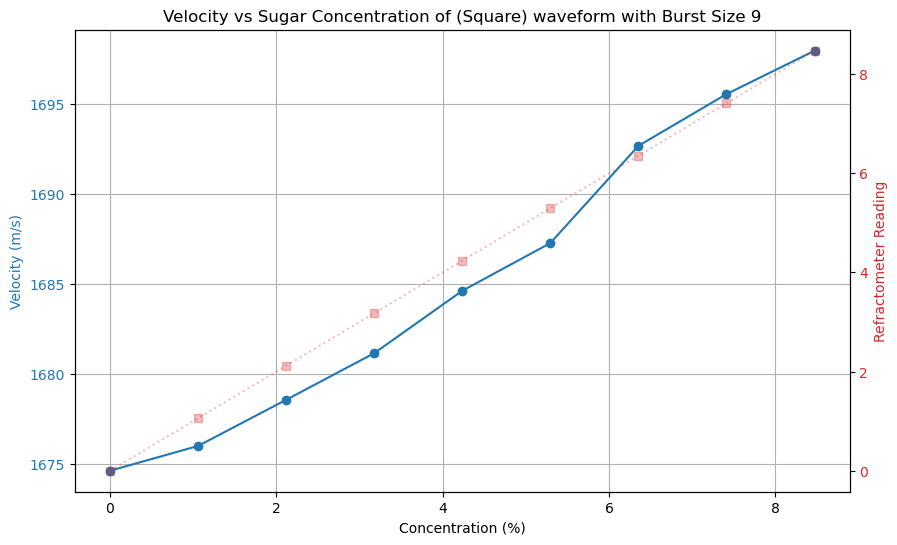

In [7]:
plot_velocity_refractometer(velocities, periods)

# Time of flight using Correlation

Selected Method is:  cross_correlation


 File Name: /Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal processing/dataset/28_May_2025/144000mg/28thmaynewsetup1percentage25DegreeTemperatureMarch-ram-WaterSugar_mid_solution-144000mg-squ9-pure_water_solution_1.mat
shape of raw signal:  (100, 2, 16000)
Period:  9
Concentration:  144000
DC Offset Removal - Transmit: (100, 16000)  | Receive: (100, 16000)
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit [(2, 212)]
Recieve [(6116, 9003)]
Transmit Valid signals after filtering: (33, 16000)
Recieve Valid signals after filtering: (33, 16000)
TOF calculated: 6139


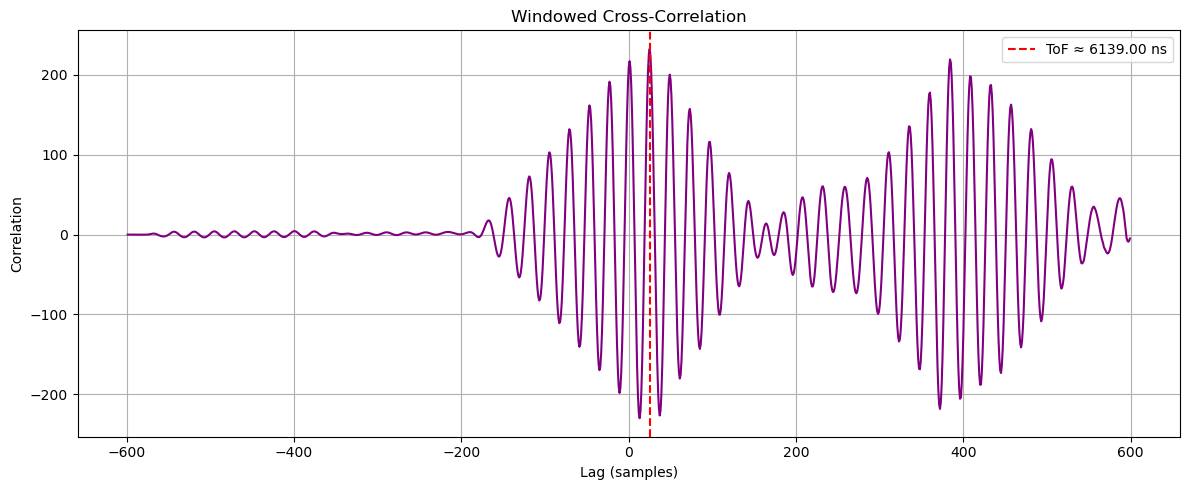

Velocity:  1.3520117282945106e-05


 File Name: /Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal processing/dataset/28_May_2025/108000mg/28thmaynewsetup1percentage25DegreeTemperatureMarch-ram-WaterSugar_mid_solution-108000mg-squ9-pure_water_solution_1.mat
shape of raw signal:  (100, 2, 16000)
Period:  9
Concentration:  108000
DC Offset Removal - Transmit: (100, 16000)  | Receive: (100, 16000)
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit [(2, 212)]
Recieve [(6134, 10044)]
Transmit Valid signals after filtering: (33, 16000)
Recieve Valid signals after filtering: (33, 16000)
TOF calculated: 6157


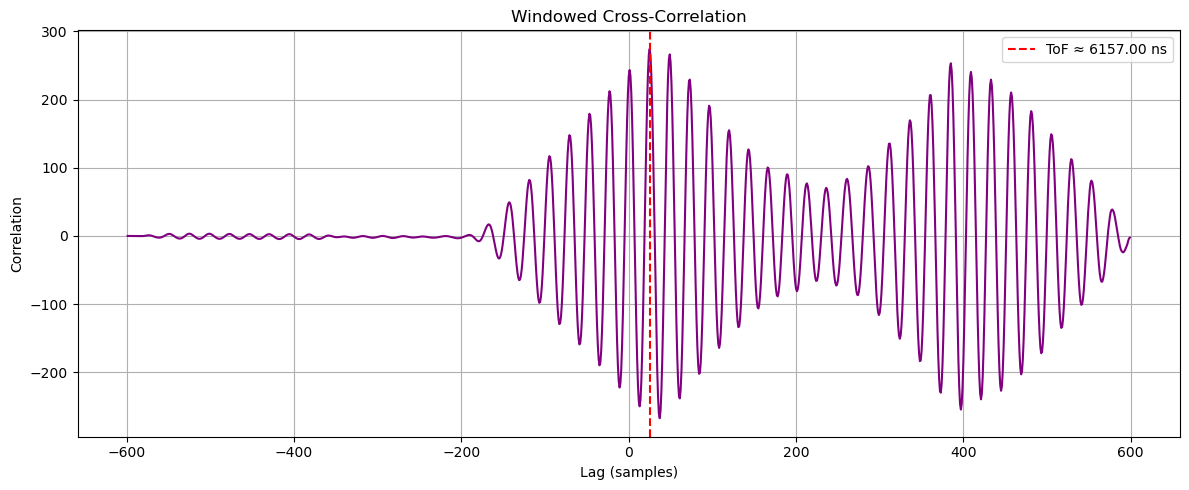

Velocity:  1.3480591197011532e-05


 File Name: /Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal processing/dataset/28_May_2025/36000mg/2025may28-ram-WaterSugar_mid_solution-36000mg-squ9-pure_water_solution_1.mat
shape of raw signal:  (100, 2, 16000)
Period:  9
Concentration:  36000
DC Offset Removal - Transmit: (100, 16000)  | Receive: (100, 16000)
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit [(2, 212)]
Recieve [(6185, 9502)]
Transmit Valid signals after filtering: (33, 16000)
Recieve Valid signals after filtering: (33, 16000)
TOF calculated: 6209


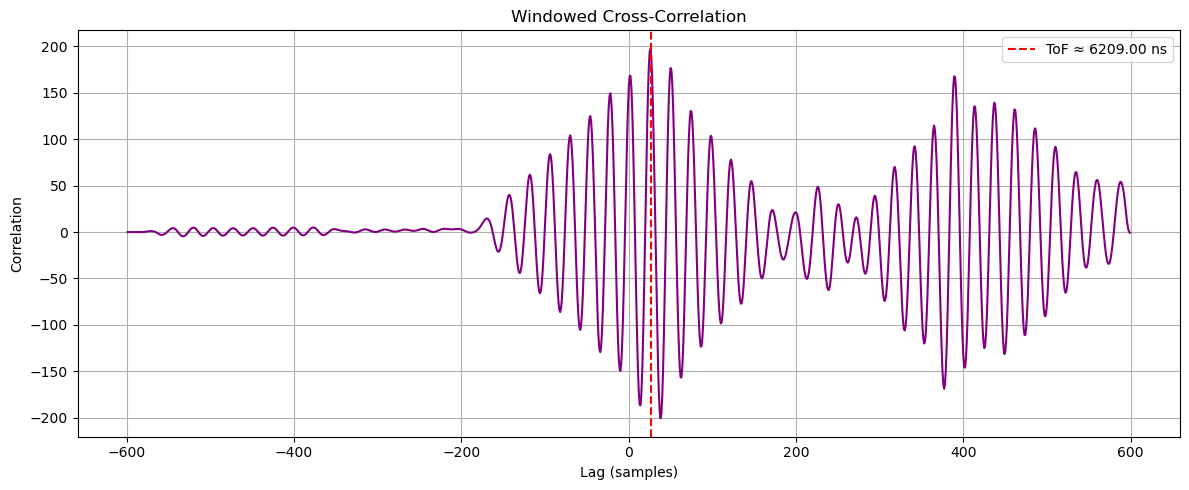

Velocity:  1.336769205991303e-05


 File Name: /Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal processing/dataset/28_May_2025/00000mg/2025may28-ram-WaterSugar_mid_solution-0mg-squ9-pure_water_solution_1.mat
shape of raw signal:  (100, 2, 16000)
Period:  9
Concentration:  0
DC Offset Removal - Transmit: (100, 16000)  | Receive: (100, 16000)
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit [(2, 212)]
Recieve [(6200, 10111)]
Transmit Valid signals after filtering: (33, 16000)
Recieve Valid signals after filtering: (33, 16000)
TOF calculated: 6222


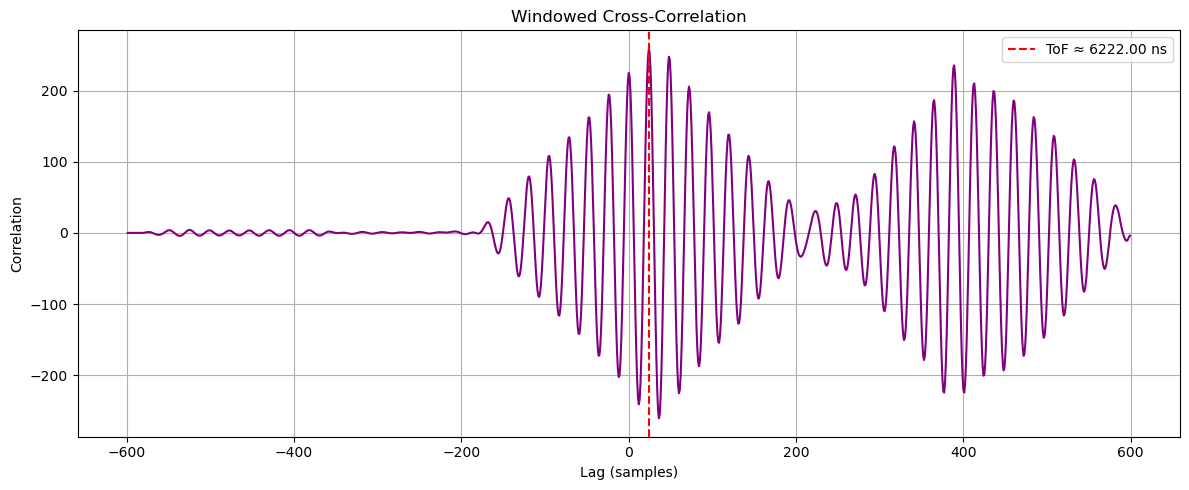

Velocity:  1.3339762134361943e-05


 File Name: /Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal processing/dataset/28_May_2025/18000mg/2025may28-ram-WaterSugar_mid_solution-18000mg-squ9-pure_water_solution_1.mat
shape of raw signal:  (100, 2, 16000)
Period:  9
Concentration:  18000
DC Offset Removal - Transmit: (100, 16000)  | Receive: (100, 16000)
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit [(2, 212)]
Recieve [(6195, 10105)]
Transmit Valid signals after filtering: (33, 16000)
Recieve Valid signals after filtering: (33, 16000)
TOF calculated: 6218


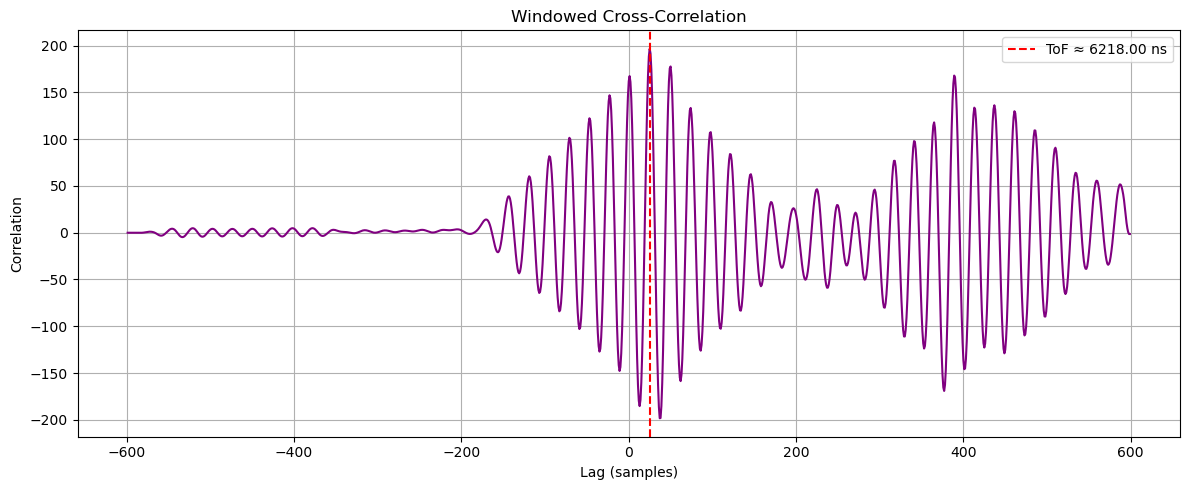

Velocity:  1.334834351881634e-05


 File Name: /Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal processing/dataset/28_May_2025/54000mg/28thmaynewsetup1percentage25DegreeTemperatureMarch-ram-WaterSugar_mid_solution-54000mg-squ9-pure_water_solution_1.mat
shape of raw signal:  (100, 2, 16000)
Period:  9
Concentration:  54000
DC Offset Removal - Transmit: (100, 16000)  | Receive: (100, 16000)
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit [(2, 212)]
Recieve [(6176, 9680)]
Transmit Valid signals after filtering: (33, 16000)
Recieve Valid signals after filtering: (33, 16000)
TOF calculated: 6199


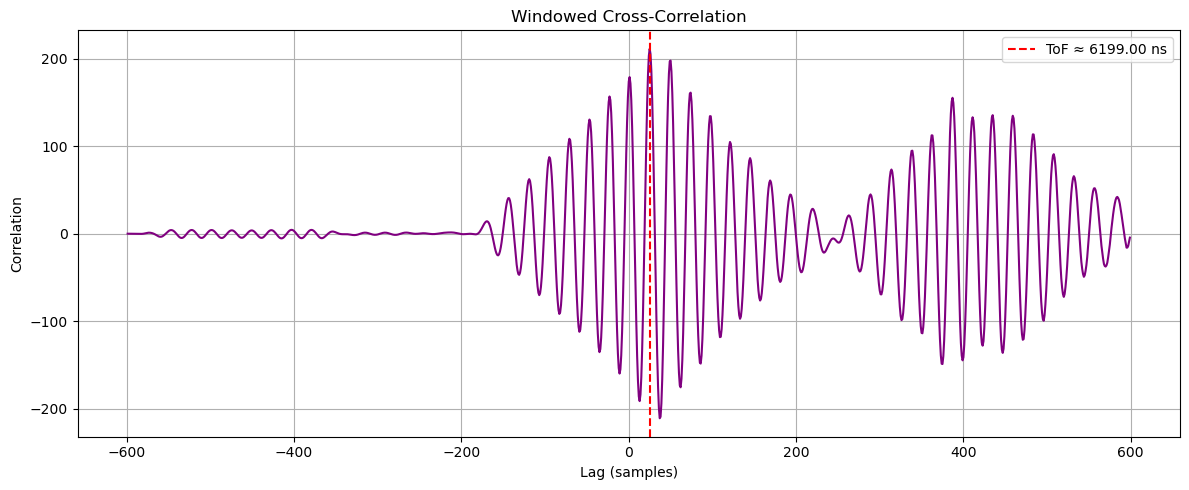

Velocity:  1.3389256331666398e-05


 File Name: /Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal processing/dataset/28_May_2025/90000mg/28thmaynewsetup1percentage25DegreeTemperatureMarch-ram-WaterSugar_mid_solution-90000mg-squ9-pure_water_solution_1.mat
shape of raw signal:  (100, 2, 16000)
Period:  9
Concentration:  90000
DC Offset Removal - Transmit: (100, 16000)  | Receive: (100, 16000)
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit [(2, 212)]
Recieve [(6154, 9469)]
Transmit Valid signals after filtering: (33, 16000)
Recieve Valid signals after filtering: (33, 16000)
TOF calculated: 6176


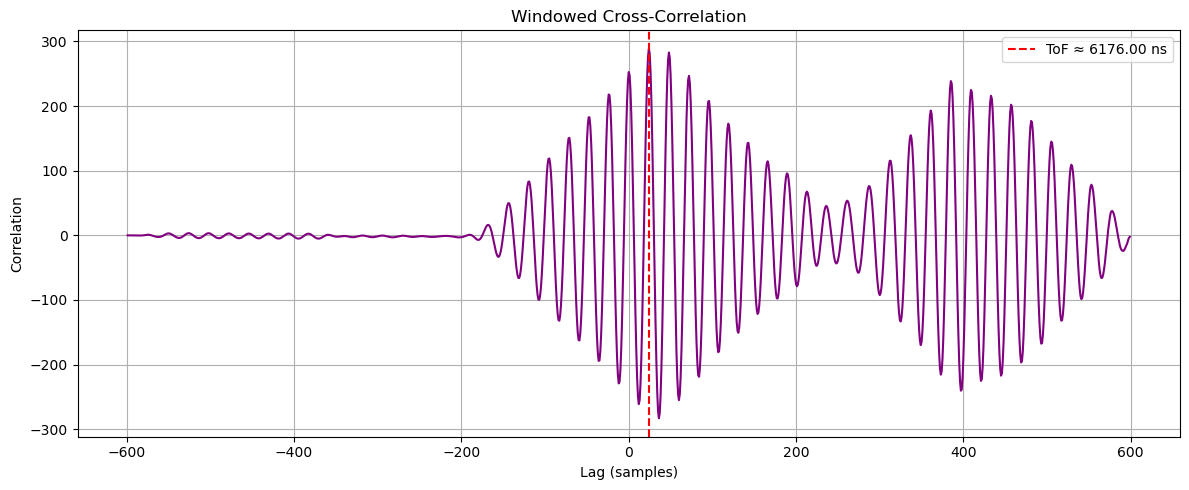

Velocity:  1.3439119170984456e-05


 File Name: /Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal processing/dataset/28_May_2025/72000mg/28thmaynewsetup1percentage25DegreeTemperatureMarch-ram-WaterSugar_mid_solution-72000mg-squ9-pure_water_solution_1.mat
shape of raw signal:  (100, 2, 16000)
Period:  9
Concentration:  72000
DC Offset Removal - Transmit: (100, 16000)  | Receive: (100, 16000)
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit [(2, 212)]
Recieve [(6163, 9064)]
Transmit Valid signals after filtering: (33, 16000)
Recieve Valid signals after filtering: (33, 16000)
TOF calculated: 6186


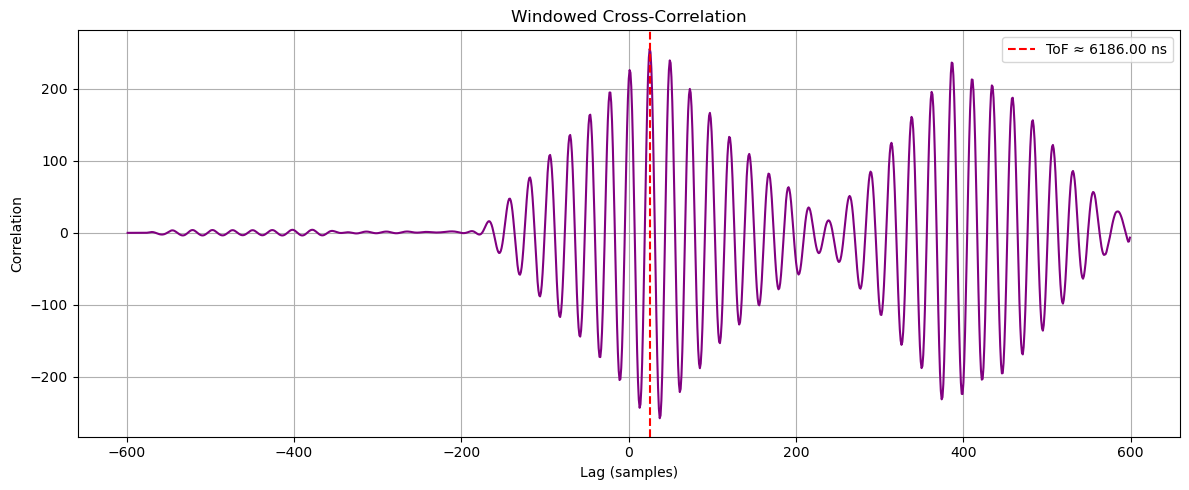

Velocity:  1.3417394115745231e-05


 File Name: /Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal processing/dataset/28_May_2025/126000mg/28thmaynewsetup1percentage25DegreeTemperatureMarch-ram-WaterSugar_mid_solution-126000mg-squ9-pure_water_solution_1.mat
shape of raw signal:  (100, 2, 16000)
Period:  9
Concentration:  126000
DC Offset Removal - Transmit: (100, 16000)  | Receive: (100, 16000)
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit [(2, 212)]
Recieve [(6124, 9011)]
Transmit Valid signals after filtering: (33, 16000)
Recieve Valid signals after filtering: (33, 16000)
TOF calculated: 6147


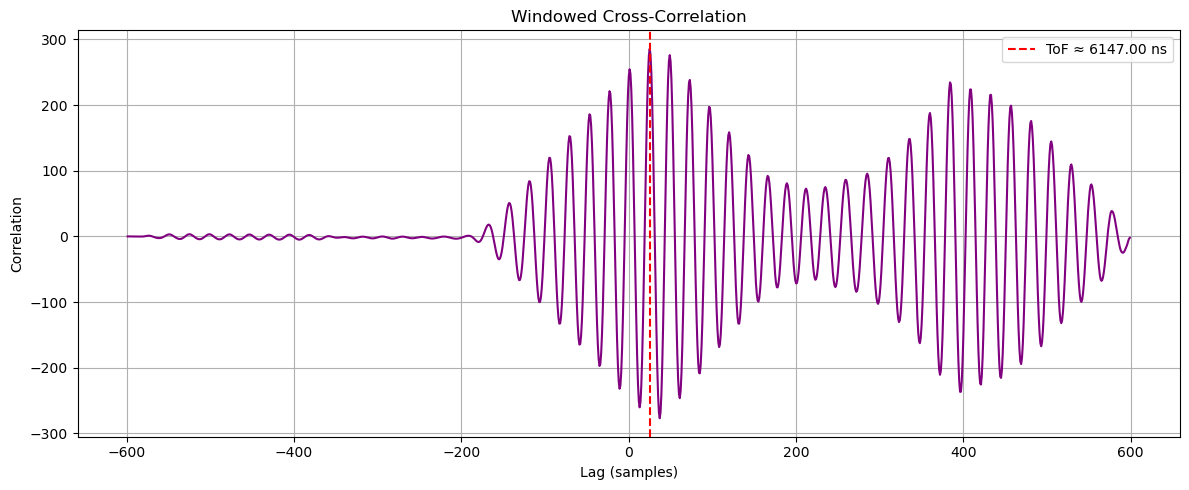

Velocity:  1.3502521555230194e-05
Selectd Index []


In [ ]:
corr_velocities,time_of_flight,actual_waveform,receive_selected_index_list,transmit_selected_index_list =process_signals(unique_file_list, tof_method_index=2)

In [9]:
corr_velocities = sorted(corr_velocities, key=lambda x : x[0])


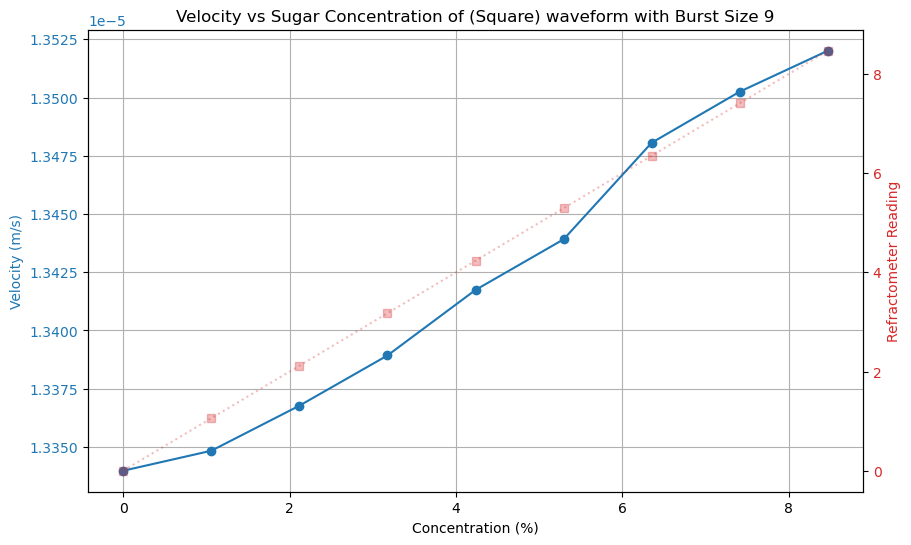

In [10]:
plot_velocity_refractometer(corr_velocities, periods)